In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf

In [2]:
# Read the weather data from the "weatherAUS.csv" file and store it in the 'weather_data' DataFrame
weather_data = pd.read_csv("weatherAUS.csv")

In [3]:
# Display the first few rows of the 'weather_data' DataFrame to get an overview of the dataset
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Retrieve the unique values present in the 'Location' column of the 'weather_data' DataFrame
weather_data['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [5]:
# Get the shape (number of rows and columns)
weather_data.shape

(145460, 23)

In [6]:
# Create a new DataFrame 'selected_df' containing rows where the 'Location' is "Albury"
selcted_df = weather_data[(weather_data.Location == "Albury")]

In [7]:
selcted_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,2017-06-21,Albury,1.2,15.2,0.4,NaN,NaN,ENE,15.0,NaN,...,100.0,62.0,1029.4,1026.7,8.0,NaN,2.9,14.3,No,No
3036,2017-06-22,Albury,0.8,13.4,0.0,NaN,NaN,W,17.0,S,...,100.0,66.0,1029.4,1025.9,8.0,1.0,3.6,13.3,No,No
3037,2017-06-23,Albury,1.1,11.9,0.0,NaN,NaN,SE,44.0,SSE,...,100.0,81.0,1022.3,1017.7,8.0,1.0,2.7,10.2,No,No
3038,2017-06-24,Albury,1.1,14.1,0.2,NaN,NaN,WSW,28.0,SW,...,100.0,49.0,1018.8,1017.2,7.0,6.0,3.9,13.1,No,No


In [8]:
# Create a new DataFrame 'ext_weather_data' by selecting specific columns from 'selected_df'
ext_weather_data = selcted_df[["Date" , "MinTemp", "MaxTemp" , "WindGustSpeed", "Humidity9am", "Rainfall"]]
ext_weather_data.head()

,Date,MinTemp,MaxTemp,WindGustSpeed,Humidity9am,Rainfall
0,2008-12-01,13.4,22.9,44.0,71.0,0.6
1,2008-12-02,7.4,25.1,44.0,44.0,0.0
2,2008-12-03,12.9,25.7,46.0,38.0,0.0
3,2008-12-04,9.2,28.0,24.0,45.0,0.0
4,2008-12-05,17.5,32.3,41.0,82.0,1.0


In [9]:
# Generate descriptive statistics for the 'ext_weather_data' DataFrame
ext_weather_data.describe()

,MinTemp,MaxTemp,WindGustSpeed,Humidity9am,Rainfall
count,3029.000000,3029.000000,3008.000000,3031.000000,3011.000000
mean,9.530604,22.640872,32.977394,74.070604,1.914115
std,6.069485,7.794924,13.378187,17.435775,6.230014
min,-2.800000,6.800000,9.000000,18.000000,0.000000
25%,4.700000,15.800000,24.000000,61.000000,0.000000
50%,9.100000,21.900000,31.000000,76.000000,0.000000
75%,14.300000,28.900000,41.000000,88.000000,0.400000
max,28.300000,44.800000,107.000000,100.000000,104.200000


In [10]:
# Display information about the 'ext_weather_data' DataFrame, including data types and memory usage
ext_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3040 entries, 0 to 3039
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3040 non-null   object 
 1   MinTemp        3029 non-null   float64
 2   MaxTemp        3029 non-null   float64
 3   WindGustSpeed  3008 non-null   float64
 4   Humidity9am    3031 non-null   float64
 5   Rainfall       3011 non-null   float64
dtypes: float64(5), object(1)
memory usage: 166.2+ KB


In [11]:
# Check and display the sum of missing values in each column of the 'ext_weather_data' DataFrame
ext_weather_data.isnull().sum()

Date              0
MinTemp          11
MaxTemp          11
WindGustSpeed    32
Humidity9am       9
Rainfall         29
dtype: int64

In [12]:
# Filter rows in 'ext_weather_data' where the 'MinTemp' column has missing values
ext_weather_data[pd.isnull(ext_weather_data["MinTemp"])]

,Date,MinTemp,MaxTemp,WindGustSpeed,Humidity9am,Rainfall
284,2009-09-11,NaN,18.8,31.0,83.0,NaN
444,2010-02-18,NaN,31.2,31.0,33.0,NaN
453,2010-02-27,NaN,26.3,26.0,70.0,NaN
459,2010-03-05,NaN,22.3,37.0,74.0,0.0
612,2010-08-05,NaN,11.8,28.0,97.0,NaN
984,2011-09-11,NaN,NaN,NaN,NaN,NaN
985,2011-09-12,NaN,NaN,NaN,NaN,NaN
986,2011-09-13,NaN,15.8,NaN,NaN,NaN
1686,2013-10-11,NaN,18.5,37.0,73.0,NaN
2032,2014-09-22,NaN,NaN,NaN,NaN,NaN


In [13]:
# Fill missing values in the 'Rainfall' column with zeros in the 'ext_weather_data' DataFrame
ext_weather_data["Rainfall"] = ext_weather_data["Rainfall"].fillna(0)

C:\Users\kadde\AppData\Local\Temp\ipykernel_19160\352443040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ext_weather_data["Rainfall"] = ext_weather_data["Rainfall"].fillna(0)


In [14]:
# Fill missing values in the 'Humidity9am' column with zeros in the 'ext_weather_data' DataFrame
ext_weather_data["Humidity9am"] = ext_weather_data["Humidity9am"].fillna(0)

C:\Users\kadde\AppData\Local\Temp\ipykernel_19160\3177046782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ext_weather_data["Humidity9am"] = ext_weather_data["Humidity9am"].fillna(0)


In [15]:
# Fill missing values in the 'ext_weather_data' DataFrame using forward fill method
ext_weather_data = ext_weather_data.fillna(method="ffill")

C:\Users\kadde\AppData\Local\Temp\ipykernel_19160\2480277049.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ext_weather_data = ext_weather_data.fillna(method="ffill")


In [16]:
# Check and display the sum of missing values in each column of the 'ext_weather_data' DataFrame
ext_weather_data.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
WindGustSpeed    0
Humidity9am      0
Rainfall         0
dtype: int64

In [17]:
#rain_label = ["No rain" , "Light rain" , "Moderate rain" , "Heavy rain" ,"Violent rain"]
rain_label = [0 , 1 , 2 , 3 ,4]
# Create a new column 'RainGroup' in 'ext_weather_data' based on 'Rainfall' values using specified bins and labels
ext_weather_data['RainGroup'] = pd.cut(ext_weather_data["Rainfall"], bins=[-1,0,2.5,10.0,50.0,110.0], right=True, labels = rain_label)
ext_weather_data

,Date,MinTemp,MaxTemp,WindGustSpeed,Humidity9am,Rainfall,RainGroup
0,2008-12-01,13.4,22.9,44.0,71.0,0.6,1
1,2008-12-02,7.4,25.1,44.0,44.0,0.0,0
2,2008-12-03,12.9,25.7,46.0,38.0,0.0,0
3,2008-12-04,9.2,28.0,24.0,45.0,0.0,0
4,2008-12-05,17.5,32.3,41.0,82.0,1.0,1
...,...,...,...,...,...,...,...
3035,2017-06-21,1.2,15.2,15.0,100.0,0.4,1
3036,2017-06-22,0.8,13.4,17.0,100.0,0.0,0
3037,2017-06-23,1.1,11.9,44.0,100.0,0.0,0
3038,2017-06-24,1.1,14.1,28.0,100.0,0.2,1


In [18]:
# Generate descriptive statistics for the 'ext_weather_data' DataFrame, including measures of central tendency and dispersion, after filling missing values
ext_weather_data.describe()

,MinTemp,MaxTemp,WindGustSpeed,Humidity9am,Rainfall
count,3040.000000,3040.000000,3040.000000,3040.000000,3040.000000
mean,9.522928,22.633487,33.017763,73.851316,1.895855
std,6.069672,7.791903,13.370305,17.869134,6.203009
min,-2.800000,6.800000,9.000000,0.000000,0.000000
25%,4.700000,15.800000,24.000000,60.000000,0.000000
50%,9.100000,21.900000,31.000000,76.000000,0.000000
75%,14.300000,28.900000,41.000000,88.000000,0.400000
max,28.300000,44.800000,107.000000,100.000000,104.200000


In [19]:
# Convert the 'Date' column to datetime format in the 'ext_weather_data' DataFrame
ext_weather_data['Date'] = pd.to_datetime(ext_weather_data['Date'])

In [20]:
# Set the 'Date' column as the index in the 'ext_weather_data' DataFrame
ext_weather_data.set_index('Date', inplace=True)

In [21]:
# Count occurrences of each year in the index of 'ext_weather_data', and sort the results by the year
ext_weather_data.index.year.value_counts().sort_index()

Date
2008     31
2009    365
2010    365
2011    335
2012    335
2013    337
2014    365
2015    365
2016    366
2017    176
Name: count, dtype: int64

<Axes: xlabel='Date'>

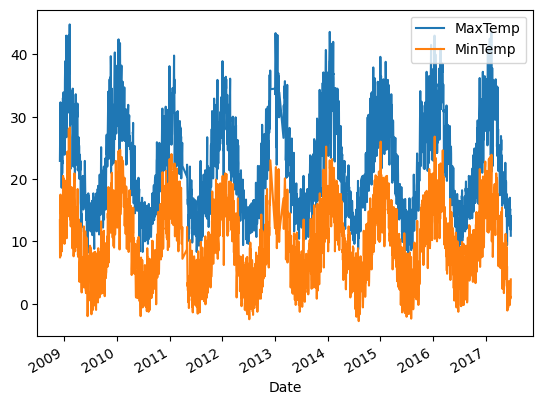

In [22]:
# Plot the 'MaxTemp' and 'MinTemp' columns over time in the 'ext_weather_data' DataFrame
ext_weather_data[["MaxTemp", "MinTemp"]].plot()

<Axes: xlabel='RainGroup'>

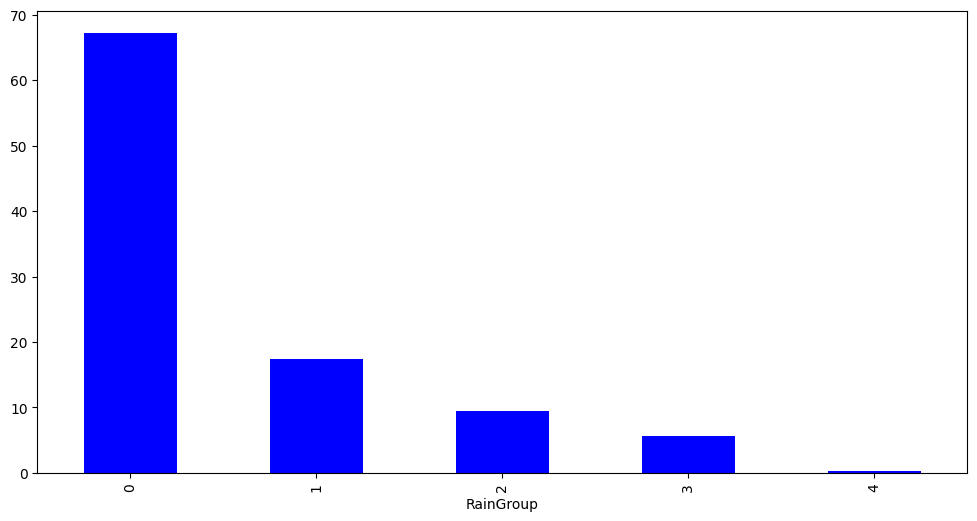

In [23]:
# Create a normalized bar plot of the 'RainGroup' column in the 'ext_weather_data' DataFrame
pd.DataFrame(ext_weather_data).RainGroup.value_counts(normalize=True).mul(100).sort_index().plot(kind =
 "bar", color = 'blue',figsize=(12, 6))

In [24]:
# The 'MinTemp' column is plotted against the 'RainGroup' column from the 'ext_weather_data' DataFrame
fig = px.scatter(ext_weather_data, y="MinTemp", x="RainGroup")
fig.show()

In [25]:
# The 'MaxTemp' column is plotted against the 'RainGroup' column from the 'ext_weather_data' DataFrame
fig = px.scatter(ext_weather_data, y="MaxTemp", x="RainGroup")
fig.show()

In [26]:
# The 'WindGustSpeed' column is plotted against the 'RainGroup' column from the 'ext_weather_data' DataFrame
fig = px.scatter(ext_weather_data, y="WindGustSpeed", x="RainGroup")
fig.show()

In [27]:
# The 'Humidity9am' column is plotted against the 'RainGroup' column from the 'ext_weather_data' DataFrame
fig = px.scatter(ext_weather_data, y="Humidity9am", x="RainGroup")
fig.show()

C:\Users\kadde\AppData\Local\Temp\ipykernel_19160\3565899248.py:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



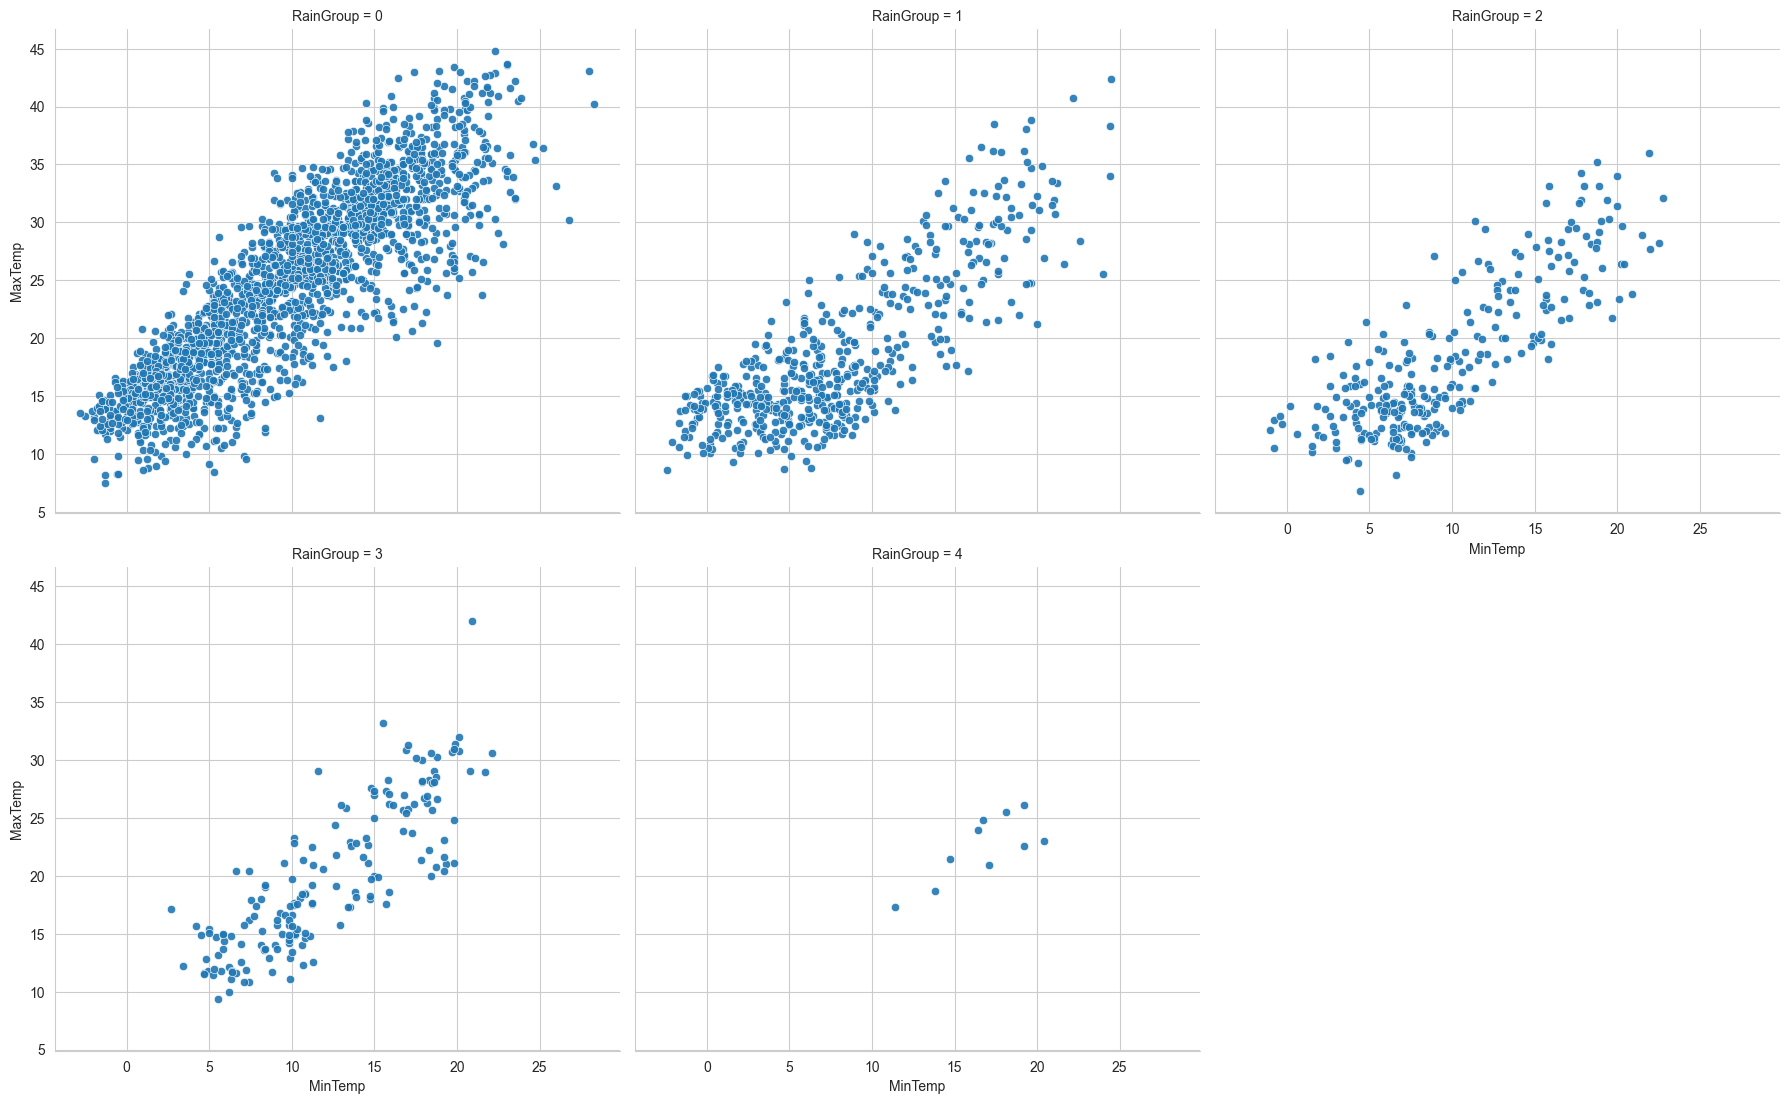

In [28]:
# 'MinTemp' is plotted against 'MaxTemp' for different 'RainGroup' categories
sns.set_style("whitegrid")

myplot = sns.relplot(
    data=ext_weather_data, x="MinTemp", y="MaxTemp",
    col="RainGroup",
    kind="scatter",
    palette="hls" ,
    alpha=0.9,
    col_wrap=3,
    height=6
)

plt.subplots_adjust(top=0.9)

C:\Users\kadde\AppData\Local\Temp\ipykernel_19160\368536206.py:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



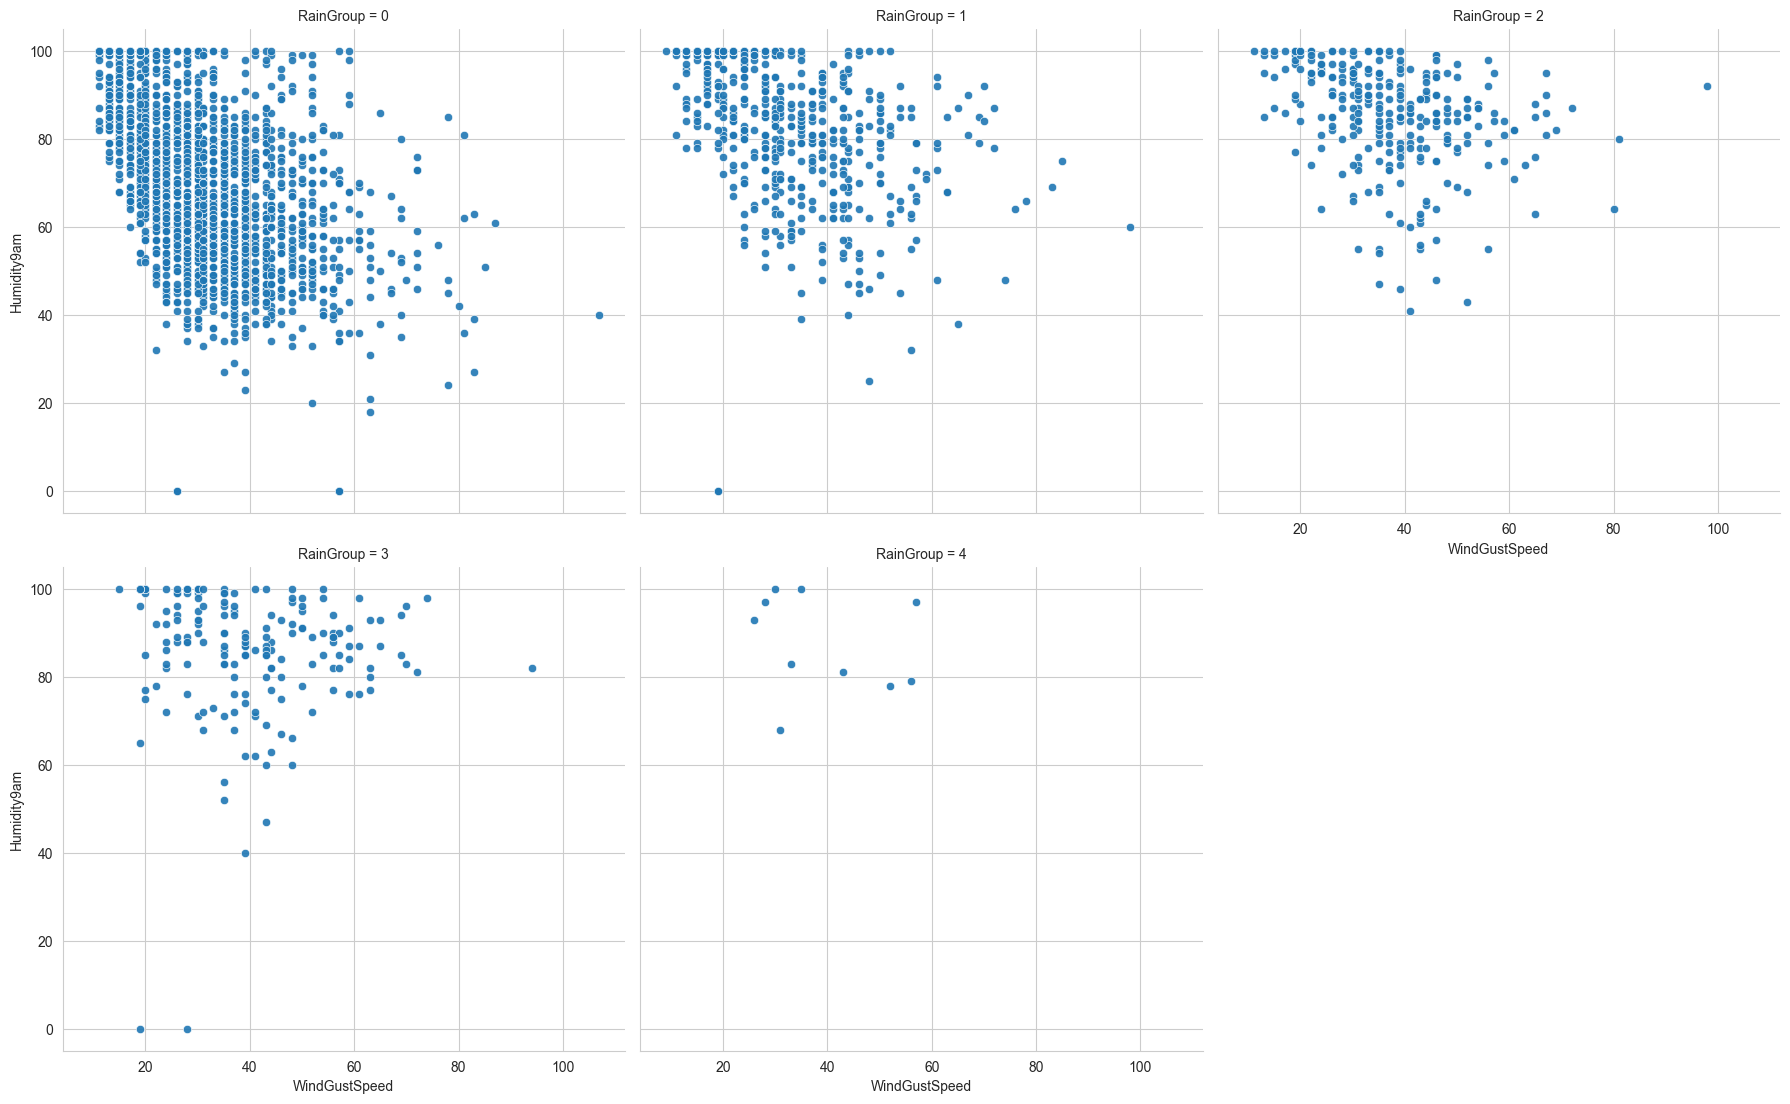

In [29]:
# 'WindGustSpeed' is plotted against 'Humidity9am' for different 'RainGroup' categories
sns.set_style("whitegrid")

myplot = sns.relplot(
    data=ext_weather_data, x="WindGustSpeed", y="Humidity9am",
    col="RainGroup",
    kind="scatter",
    palette="hls" ,
    alpha=0.9,
    col_wrap=3,
    height=6 
)


plt.subplots_adjust(top=0.9)

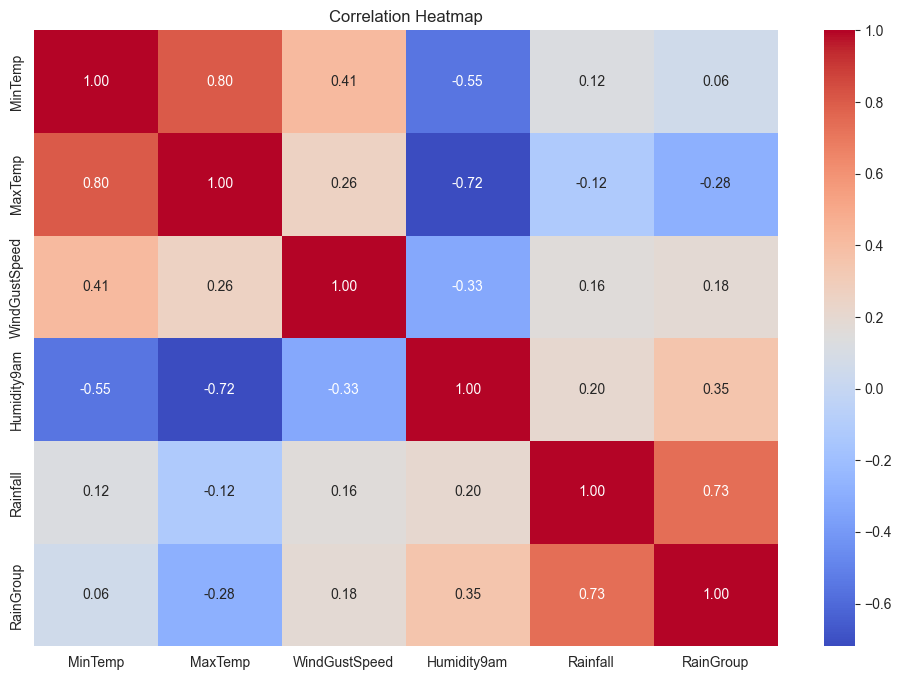

In [30]:

# Specify the columns you want to include in the heatmap
columns = ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'Humidity9am', 'Rainfall', 'RainGroup']

plt.figure(figsize=(12, 8))

# Extract the specified columns from the DataFrame
heatmap_data = ext_weather_data[columns].corr()

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

In [31]:
ext_weather_datacopy = ext_weather_data.copy() #create a new copy of ext_weather_data
 
from sklearn.model_selection import train_test_split

X = ext_weather_data.drop(['RainGroup'], axis=1)  # Features
Y = ext_weather_data['RainGroup']  # Target variable(RainGroup)
# Split the dataset to test and train
traindf, testdf, trainy, testy = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
traindf.shape # Get the shape of traindf (number of rows and columns)

(2432, 5)

DNNClassifier

In [33]:
def input_fn(features, labels, training=True, batch_size=256):
    # Create a TensorFlow Dataset from features and labels
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

     # If training, shuffle the dataset and repeat it for multiple epochs
    if training:
        dataset = dataset.shuffle(1000).repeat()

    # Batch the dataset
    return dataset.batch(batch_size)

# Create a list of numeric feature columns based on the columns in 'traindf'
my_feature_columns = []
for key in traindf.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

# Define a DNNClassifier model with specified feature columns, hidden units, and number of classes
classifier1 = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    hidden_units=[30, 10], # Two hidden layers with 30 and 10 units, respectively
    n_classes=5) # Number of target classes

# Train the classifier using the input function for training data and a specified number of steps
classifier1.train(
    input_fn=lambda: input_fn(traindf, trainy, training=True),
    steps=5000)

# Evaluate the trained classifier using the input function for test data
eval_result = classifier1.evaluate(input_fn=lambda: input_fn(testdf, testy, training=False))

# Print the test set accuracy from the evaluation result
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.

INFO:tensorflow:Using default config.

INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\kadde\\AppData\\Local\\Temp\\tmp_ydz6hgx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protoc

In [34]:
# Create an empty DataFrame and add the 'Actual' column to the DataFrame using the NumPy array
Raingroup = testy.to_numpy()
arr1 = np.array(Raingroup)
df = pd.DataFrame()
df['Actual'] = pd.Series(arr1)

In [35]:
df #print the df

,Actual
0,0
1,0
2,0
3,0
4,1
...,...
603,3
604,0
605,0
606,0


LogisticRegression

In [36]:
# Import Logistic Regression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logisticregression = LogisticRegression()
logisticregression.fit(traindf,trainy)

# Make predictions on the test data
predictions1 = logisticregression.predict(testdf)

# Print the test set accuracy
lraccuracy = str(accuracy_score(testy, predictions1))
print('Test set accuracy: ' + lraccuracy)

Test set accuracy: 0.9194078947368421


c:\Users\kadde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



RandomForestClassifier

In [37]:
# Import Random Forest Classifier model from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier model
randomforest = RandomForestClassifier()
randomforest.fit(traindf,trainy)

# Make predictions on the test data
predictions2 = randomforest.predict(testdf)
rfaccuracy = str(accuracy_score(testy, predictions2))
print('Test set accuracy: ' + rfaccuracy)

Test set accuracy: 0.9967105263157895


DecisionTreeClassifier

In [38]:
# Import Decision Tree Classifier model from scikit-learn
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(traindf,trainy)
predictions3 = decisiontree.predict(testdf)

dtaccuracy = str(accuracy_score(testy, predictions3))
print('Test set accuracy: ' + dtaccuracy)

Test set accuracy: 1.0


MLPClassifier

In [39]:
# Import MLPClassifier model from scikit-learn
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(traindf, trainy)
predictions4 = mlp.predict(testdf)
mlpaccuracy = str(accuracy_score(testy, predictions4))
print('Test set accuracy: ' + mlpaccuracy)

Test set accuracy: 0.9342105263157895


c:\Users\kadde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



GaussianNB

In [40]:
# Import GaussianNB model from scikit-learn
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(traindf, trainy)
predictions5 = gnb.predict(testdf)
gnbaccuary = str(accuracy_score(testy, predictions5))
print('Test set accuracy: ' + gnbaccuary)

Test set accuracy: 0.9901315789473685


In [41]:
# Convert predictions to NumPy arrays and add columns to the DataFrame 'df'

arrpred1 = np.array(predictions1)
df['lr Predictions'] = pd.Series(arrpred1)
arrpred2 = np.array(predictions2)
df['rf Predictions'] = pd.Series(arrpred2)
arrpred3 = np.array(predictions3)
df['dt Predictions'] = pd.Series(arrpred3)
arrpred4 = np.array(predictions4)
df['mlp Predictions'] = pd.Series(arrpred4)
arrpred5 = np.array(predictions5)
df['gnb Predictions'] = pd.Series(arrpred5)

In [42]:
df

,Actual,lr Predictions,rf Predictions,dt Predictions,mlp Predictions,gnb Predictions
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,0,1,1,0,1
...,...,...,...,...,...,...
603,3,3,3,3,3,3
604,0,0,0,0,0,0
605,0,0,0,0,0,0
606,0,0,0,0,0,0


In [43]:
# Create a scatter plot using Plotly Express with 'Actual' and 'lr Predictions' columns from the DataFrame 'df'
fig = px.scatter(df[['Actual' , 'lr Predictions']])

# Update trace markers for 'Actual' and 'Predictions 1'
fig.update_traces(marker=dict(symbol='circle', size=10), selector=dict(mode='markers'))
fig.update_traces(marker=dict(symbol='x', size=5), selector=dict(mode='markers', name='lr Predictions'))

fig.show()


In [44]:
# Create a scatter plot using Plotly Express with 'Actual' and 'rf Predictions' columns from the DataFrame 'df'
fig = px.scatter(df[['Actual' , 'rf Predictions']])
fig.update_traces(marker=dict(symbol='circle', size=10), selector=dict(mode='markers'))
fig.update_traces(marker=dict(symbol='x', size=5), selector=dict(mode='markers', name='rf Predictions'))
fig.show()

In [45]:
# Create a scatter plot using Plotly Express with 'Actual' and 'dt Predictions' columns from the DataFrame 'df'
fig = px.scatter(df[['Actual' , 'dt Predictions']])
fig.update_traces(marker=dict(symbol='circle', size=10), selector=dict(mode='markers'))
fig.update_traces(marker=dict(symbol='x', size=5), selector=dict(mode='markers', name='dt Predictions'))
fig.show()

In [46]:
# Create a scatter plot using Plotly Express with 'Actual' and 'mlp Predictions' columns from the DataFrame 'df'
fig = px.scatter(df[['Actual' , 'mlp Predictions']])
fig.update_traces(marker=dict(symbol='circle', size=10), selector=dict(mode='markers'))
fig.update_traces(marker=dict(symbol='x', size=5), selector=dict(mode='markers', name='mlp Predictions'))

fig.show()

In [47]:
# Create a scatter plot using Plotly Express with 'Actual' and 'gnb Predictions ' columns from the DataFrame 'df'
fig = px.scatter(df[['Actual' , 'gnb Predictions']])
fig.update_traces(marker=dict(symbol='circle', size=10), selector=dict(mode='markers'))
fig.update_traces(marker=dict(symbol='x', size=5), selector=dict(mode='markers', name='gnb Predictions'))

fig.show()

In [48]:
# Convert accuracy results to NumPy arrays for different models
dnnacc = np.array(eval_result['accuracy'])
lracc = np.array(lraccuracy)
rfacc = np.array(rfaccuracy)
dtacc = np.array(dtaccuracy)
mlpacc = np.array(mlpaccuracy)
gnbacc = np.array(gnbaccuary)

# Create a DataFrame to store model accuracy results
data = {'model': ['dnn accuracy', 'lr accuracy', 'rt accuracy', 'dt accuracy', 'mlp accuracy', 'gnb accuracy'],
        'Accuracy': [float(dnnacc), float(lracc), float(rfacc), float(dtacc),float(mlpacc), float(gnbacc)]}

dfaccuary = pd.DataFrame(data)

In [49]:
dfaccuary

,model,Accuracy
0,dnn accuracy,0.690789
1,lr accuracy,0.919408
2,rt accuracy,0.996711
3,dt accuracy,1.000000
4,mlp accuracy,0.934211
5,gnb accuracy,0.990132


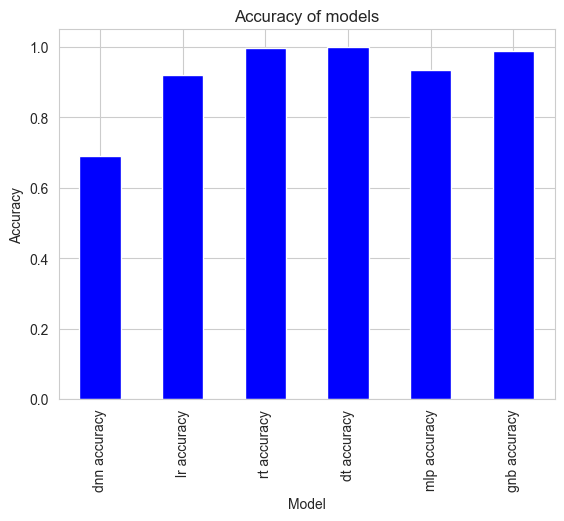

In [50]:
# Plotting a bar chart for the 'Accuracy' column
dfaccuary.plot(x='model', y='Accuracy', kind='bar', legend=False, color='blue')


# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of models')

# Display the plot
plt.show()